# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [96]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer,load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [97]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [98]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [99]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [100]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [101]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.0011991024017333984 (+/-) 0.0006161212275321767
avg score time: 0.0019498825073242187 (+/-) 0.0006350761666087267
avg test time: 0.96 (+/-) 0.024944382578492935


In [102]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.016876983642578124 (+/-) 0.0019787770121041676
avg score time: 0.00670166015625 (+/-) 0.00012865181407033808
avg test time: 0.9399999999999998 (+/-) 0.038873012632301994


##### 와인 데이터

In [103]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [104]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.001181650161743164 (+/-) 0.00040360352821688304
avf score get time: 0.0020000457763671873 (+/-) 0.0003012002367816849
avf test get time: 0.9493650793650794 (+/-) 0.037910929811115976


In [105]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.017255783081054688 (+/-) 0.0018234961625117417
avf score get time: 0.007223844528198242 (+/-) 0.00023535263940012755
avf test get time: 0.9498412698412698 (+/-) 0.05379851926617549


##### 유방암 데이터

In [106]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [107]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.0021338462829589844 (+/-) 0.0006251440258291747
avf score get time: 0.007170248031616211 (+/-) 0.0015874155606422288
avf test get time: 0.9648501785437045 (+/-) 0.009609970350036127


In [108]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.020494413375854493 (+/-) 0.004454006401052486
avf score get time: 0.014680433273315429 (+/-) 0.0011545167389960128
avf test get time: 0.9613414066138798 (+/-) 0.011881146717921549


#### SVC

##### 붓꽃 데이터

In [109]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [110]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.001638031005859375 (+/-) 0.0005617132939783557
avf score get time: 0.0005802631378173829 (+/-) 0.00019376689658443785
avf test get time: 0.9666666666666666 (+/-) 0.02108185106778919


In [111]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.025746488571166994 (+/-) 0.005484250666806717
avf score get time: 0.0031322479248046876 (+/-) 0.000841252239562723
avf test get time: 0.9666666666666668 (+/-) 0.02108185106778919


##### 와인 데이터

In [112]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [113]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.002102184295654297 (+/-) 0.0005503709013157605
avf score get time: 0.0005850315093994141 (+/-) 0.0002097252876415033
avf test get time: 0.9833333333333334 (+/-) 0.022222222222222233


In [114]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.02448239326477051 (+/-) 0.001218600936622411
avf score get time: 0.0030241489410400392 (+/-) 5.181475892521425e-05
avf test get time: 0.943968253968254 (+/-) 0.030875362052280638


##### 유방암 데이터

In [115]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [116]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.006151866912841797 (+/-) 0.0011943536530947606
avf score get time: 0.0013659000396728516 (+/-) 0.0002354127713086084
avf test get time: 0.9736376339077782 (+/-) 0.014678541667933545


In [117]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.03574061393737793 (+/-) 0.00436442681045919
avf score get time: 0.006749725341796875 (+/-) 0.0004070580553314065
avf test get time: 0.9666356155876418 (+/-) 0.016980668037288846


#### Decision Tree

##### 붓꽃 데이터

In [118]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [119]:
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.0012785911560058594 (+/-) 0.0004356711986177654
avf score get time: 0.0004757881164550781 (+/-) 0.00016261878159185193
avf test get time: 0.9600000000000002 (+/-) 0.03265986323710903


In [120]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.02303037643432617 (+/-) 0.0021235605465033617
avf score get time: 0.0032129764556884767 (+/-) 0.0014827514953712872
avf test get time: 0.9466666666666667 (+/-) 0.039999999999999994


##### 와인 데이터

In [121]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [122]:
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.0023333072662353516 (+/-) 0.000547110716337275
avf score get time: 0.0005392551422119141 (+/-) 0.00015999832972965516
avf test get time: 0.8765079365079365 (+/-) 0.03321445165041705


In [123]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.02255706787109375 (+/-) 0.001511638008221722
avf score get time: 0.0021402835845947266 (+/-) 1.635697416682105e-05
avf test get time: 0.943968253968254 (+/-) 0.03917645541143537


##### 유방암 데이터

In [124]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

bagging_model = BaggingClassifier(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [125]:
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.008162117004394532 (+/-) 0.0006485420030162772
avf score get time: 0.00046405792236328127 (+/-) 1.9764080536783262e-05
avf test get time: 0.9120788697407235 (+/-) 0.017848604808114784


In [126]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.03277158737182617 (+/-) 0.001544288357151288
avf score get time: 0.0024650096893310547 (+/-) 0.00018754187897532417
avf test get time: 0.9525850023288308 (+/-) 0.021867676934473786


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [127]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [128]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [129]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.0022915363311767577 (+/-) 0.00038371971106417984
avf score get time: 0.0027750492095947265 (+/-) 0.0007135968776365737
avf test get time: 0.47357748833823543 (+/-) 0.13243123464477455


In [130]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.017767667770385742 (+/-) 0.0025824785882974525
avf score get time: 0.008947229385375977 (+/-) 0.0005088520229677119
avf test get time: 0.4281134023629676 (+/-) 0.16014019221448095


##### 당뇨병 데이터

In [131]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [132]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.0015604019165039063 (+/-) 0.0007292212119541303
avf score get time: 0.0019114494323730468 (+/-) 0.0006381730720297322
avf test get time: 0.3689720650295623 (+/-) 0.044659049060165365


In [133]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.017183256149291993 (+/-) 0.0006229127206600687
avf score get time: 0.009554195404052734 (+/-) 0.000984526055831494
avf test get time: 0.42088605551508085 (+/-) 0.030854795724388515


#### SVR

##### 보스턴 주택 가격 데이터

In [134]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [135]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.015379762649536133 (+/-) 0.0011992058700035506
avf score get time: 0.0021905422210693358 (+/-) 4.140676629038675e-05
avf test get time: 0.17631266230186618 (+/-) 0.5224914915128981


In [136]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.04713916778564453 (+/-) 0.0033474071718529582
avf score get time: 0.008219480514526367 (+/-) 5.0779911170330006e-05
avf test get time: 0.15099089974323956 (+/-) 0.2980805134200357


##### 당뇨병 데이터

In [137]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [138]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.010282087326049804 (+/-) 0.0010989335409315173
avf score get time: 0.001851034164428711 (+/-) 0.00013373785394146193
avf test get time: 0.14659936199629434 (+/-) 0.02190798003342928


In [139]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.03823585510253906 (+/-) 0.002296461548082612
avf score get time: 0.008400964736938476 (+/-) 0.0025634905385093377
avf test get time: 0.07304539930781566 (+/-) 0.021941910782427545


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [140]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [141]:
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.005216360092163086 (+/-) 0.0010079721722519477
avf score get time: 0.0007707118988037109 (+/-) 0.00021551402207018532
avf test get time: 0.15846425667055702 (+/-) 0.8103452487544287


In [142]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.02687525749206543 (+/-) 0.0013810384535918338
avf score get time: 0.002236032485961914 (+/-) 3.708634526583386e-05
avf test get time: 0.34560156831270994 (+/-) 0.3018908122053578


##### 당뇨병 데이터

In [143]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)

bagging_model = BaggingRegressor(
    base_model, n_estimators=10, max_samples=0.5, max_features=0.5
)

In [144]:
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.004893112182617188 (+/-) 0.0010090707954513198
avf score get time: 0.0010264396667480468 (+/-) 0.00022780245342995486
avf test get time: -0.16027156844283524 (+/-) 0.1368765819121471


In [145]:
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.02754526138305664 (+/-) 0.002551579539451328
avf score get time: 0.0023972511291503905 (+/-) 0.00015607452003313783
avf test get time: 0.3698072735769779 (+/-) 0.028236293764049035


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [146]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [226]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [227]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.1274993896484375 (+/-) 0.006906632896302637
avf score get time: 0.0074005126953125 (+/-) 6.689755127739292e-05
avf test get time: 0.9666666666666668 (+/-) 0.02108185106778919


In [228]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.13267645835876465 (+/-) 0.00954971751356554
avf score get time: 0.008074426651000976 (+/-) 0.0009389909791280051
avf test get time: 0.9720634920634922 (+/-) 0.030430686929136006


In [229]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avf get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avf score get time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avf test get time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avf get time: 0.19126596450805664 (+/-) 0.004424796710251866
avf score get time: 0.008393383026123047 (+/-) 0.0003105489844911832
avf test get time: 0.9631113181183046 (+/-) 0.020284543682207744


### Random Forests 회귀

In [223]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [224]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.29975175857543945 (+/-) 0.005201598983401515
avg score time: 0.007132053375244141 (+/-) 5.3738299560944965e-05
avg test time: 0.6158864054359773 (+/-) 0.2377352197486701


In [225]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.24906105995178224 (+/-) 0.005511260229394334
avg score time: 0.007717657089233399 (+/-) 0.0007456477753471861
avg test time: 0.4257838746925743 (+/-) 0.04068874816284086


### Extremely Randomized Trees 분류

In [219]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [220]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.0927978515625 (+/-) 0.005497625935870516
avg score time: 0.008152294158935546 (+/-) 0.000354377901257135
avg test time: 0.9533333333333334 (+/-) 0.03399346342395189


In [221]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.09030427932739257 (+/-) 0.003456340774178206
avg score time: 0.0077091693878173825 (+/-) 6.044869751283754e-05
avg test time: 0.9888888888888889 (+/-) 0.01360827634879544


In [222]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.10814843177795411 (+/-) 0.003002531206433922
avg score time: 0.009401512145996094 (+/-) 0.0010416747490115607
avg test time: 0.9701443875174662 (+/-) 0.016246169652890517


### Extremely Randomized Trees 회귀

In [216]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [217]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.17797260284423827 (+/-) 0.003223484794101452
avg score time: 0.007578659057617188 (+/-) 0.00023837777742301627
avg test time: 0.6426343660007079 (+/-) 0.2517547833763733


In [218]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.15351171493530275 (+/-) 0.0023351467707423564
avg score time: 0.00765838623046875 (+/-) 6.863086589452551e-05
avg test time: 0.44861159470822376 (+/-) 0.03702987639363422


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

In [161]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier

In [162]:
n_classes = 3
n_estimators = 30
cmap = plt.cm.RdYlBu
plot_step = 0.02
plot_step_coarser = 0.5
RANDOM_SEED = 13

In [163]:
iris = load_iris()
plot_idx = 1
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators),
          ExtraTreesClassifier(n_estimators=n_estimators)]

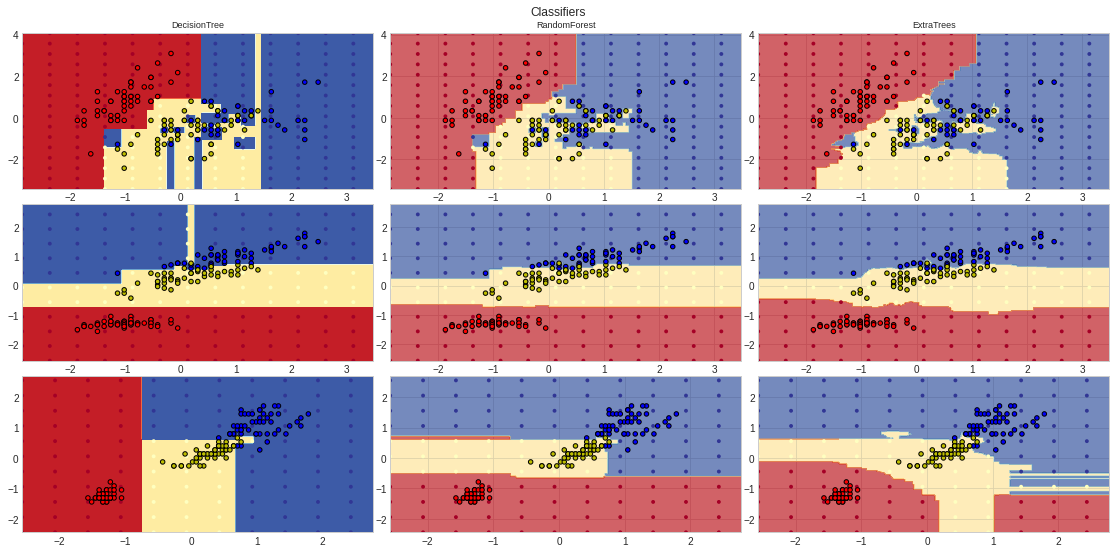

In [164]:
plt.figure(figsize=(16,8))

for pair in ([0,1],[0,2],[2,3]):
  for model in models:

    X = iris.data[:,pair]
    y = iris.target

    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X,y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Classifier')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min,x_max, plot_step),
                         np.arange(y_min,y_max, plot_step))
    
    if isinstance(model, DecisionTreeClassifier):
      Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
      Z = Z.reshape(xx.shape)
      cs = plt.contourf(xx, yy, Z , cmap= cmap)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z , alpha=estimator_alpha,cmap= cmap)

    xx_coarser, yy_coarser = np.meshgrid(np.arange(x_min, x_max, plot_step_coarser),
                                         np.arange(y_min, y_max, plot_step_coarser))
    Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                           yy_coarser.ravel()]).reshape(xx_coarser.shape)
    cs_points = plt.scatter(xx_coarser, yy_coarser, s=15, c=Z_points_coarser, cmap=cmap,
                            edgecolor='none')
    
    plt.scatter(X[:,0], X[:,1],c=y,
                cmap=ListedColormap(['r','y','b']),
                edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Classifiers', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

In [181]:
plot_idx = 1
models = [DecisionTreeRegressor(max_depth=None),
          RandomForestRegressor(n_estimators=n_estimators),
          ExtraTreesRegressor(n_estimators=n_estimators)]

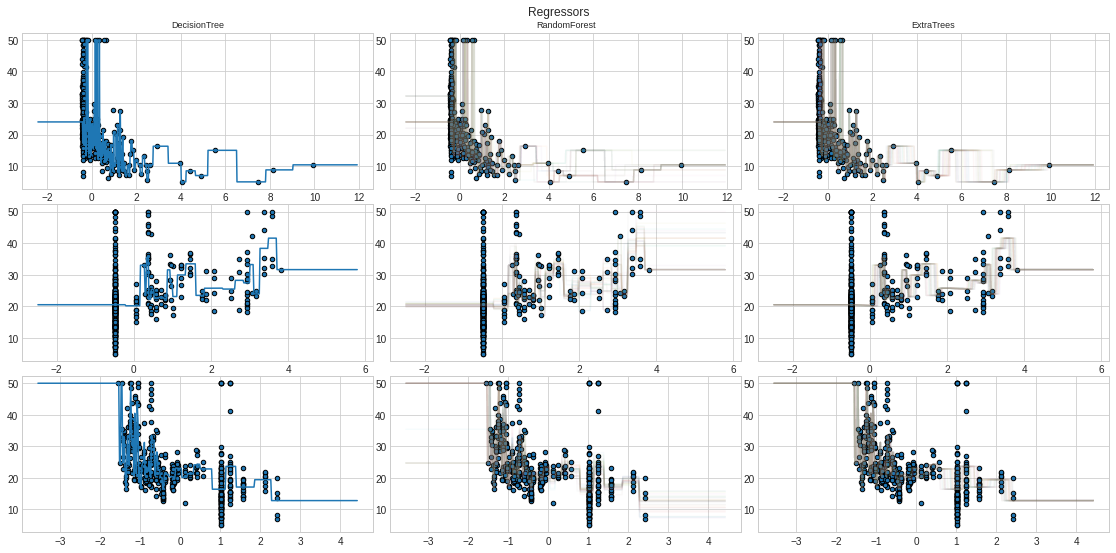

In [182]:
plt.figure(figsize=(16,8))

for pair in (0,1,2):
  for model in models:
    X = boston.data[:,pair]
    y = boston.target

    
    idx = np.arange(X.shape[0])
    np.random.seed(RANDOM_SEED)
    np.random.shuffle(idx)
    X=X[idx]
    y=y[idx]

    mean= X.mean(axis=0)
    std = X.std(axis=0)
    X= (X - mean) / std

    model.fit(X.reshape(-1,1),y)

    model_title =  str(type(model)).split('.')[-1][:-2][:-len('Regressor')]

    plt.subplot(3,3,plot_idx)
    if plot_idx <= len(models):
      plt.title(model_title, fontsize=9)

    x_min, x_max = X.min()-1, X.max()+1
    y_min, y_max = y.min()-1, y.max()+1
    xx, yy = np.arange(x_min-1,x_max+1, plot_step), np.arange(y_min-1,y_max+1, plot_step)
    
    if isinstance(model, DecisionTreeRegressor):
      Z = model.predict(xx.reshape(-1,1))
      cs = plt.plot(xx, Z)
    else:
      estimator_alpha = 1.0 / len(model.estimators_)
      for tree in model.estimators_:
        Z = tree.predict(xx.reshape(-1,1))
        cs = plt.plot(xx,Z , alpha=estimator_alpha)

    plt.scatter(X, y,edgecolor='k',s=20)
    plot_idx += 1

plt.suptitle('Regressors', fontsize=12)
plt.axis('tight')
plt.tight_layout(h_pad=0.2,w_pad=0.2,pad=2.5)
plt.show()

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

In [183]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import AdaBoostRegressor

### AdaBoost 분류

In [212]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostClassifier()
)

In [213]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.06608800888061524 (+/-) 0.0025688953387047256
avg score time: 0.0071484088897705075 (+/-) 0.0016083879467180743
avg test score: 0.9466666666666667 (+/-) 0.03399346342395189


In [214]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test time: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.07270727157592774 (+/-) 0.003952373168155578
avg score time: 0.006231498718261719 (+/-) 0.0001570469822369342
avg test time: 0.8085714285714285 (+/-) 0.16822356718459935


In [215]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.14135546684265138 (+/-) 0.002655483124335827
avg score time: 0.007092857360839843 (+/-) 6.805964761358333e-05
avg test score: 0.9701133364384411 (+/-) 0.019709915473893072


### AdaBoost 회귀

In [209]:
model = make_pipeline(
    StandardScaler(),
    AdaBoostRegressor()
)

In [210]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.09551792144775391 (+/-) 0.004059210944218529
avg score time: 0.004179668426513672 (+/-) 0.00024365750769418277
avg test score: 0.5819443408039291 (+/-) 0.22851224354373903


In [211]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.059403181076049805 (+/-) 0.02079713605782237
avg score time: 0.0031719207763671875 (+/-) 0.0014648589615230709
avg test score: 0.3983009965608303 (+/-) 0.0459204449242881


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

In [230]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

### Gradient Tree Boosting 분류

In [231]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier()
)

In [232]:
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.18494248390197754 (+/-) 0.018398129431445056
avg score time: 0.0009937763214111328 (+/-) 9.601793165852652e-05
avg test score: 0.9666666666666668 (+/-) 0.02108185106778919


In [233]:
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.22122631072998047 (+/-) 0.005263244063090987
avg score time: 0.0009349822998046875 (+/-) 5.465032313571034e-05
avg test score: 0.9330158730158731 (+/-) 0.03296317528191366


In [234]:
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.41184544563293457 (+/-) 0.0011035750078263083
avg score time: 0.0009175777435302734 (+/-) 3.949196319532297e-05
avg test score: 0.95960254618848 (+/-) 0.021167671111828695


### Gradient Tree Boosting 회귀

In [236]:
model = make_pipeline(
    StandardScaler(),
    GradientBoostingRegressor()
)

In [237]:
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.11922931671142578 (+/-) 0.005730454084648439
avg score time: 0.0009113311767578125 (+/-) 4.885000617773545e-05
avg test score: 0.684754001874632 (+/-) 0.1483809832609805


In [238]:
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.09251084327697753 (+/-) 0.003418583323076685
avg score time: 0.000982379913330078 (+/-) 3.7983484408923346e-05
avg test score: 0.4094007388078225 (+/-) 0.07040000327571636


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

In [243]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

In [240]:
model1 = SVC()
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3)],
    voting='hard'
)

In [245]:
for model in (model1, model2,model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+- %0.5f) [%s]' % (scores.mean(),scores.std(),model_name))

Accuracy: 0.97 (+- 0.02108) [SVC]
Accuracy: 0.95 (+- 0.02667) [GaussianNB]
Accuracy: 0.97 (+- 0.02108) [RandomForestClassifier]
Accuracy: 0.97 (+- 0.02108) [VotingClassifier]


In [246]:
model1 = SVC(probability=True)
model2 = GaussianNB()
model3 = RandomForestClassifier()
vote_model = VotingClassifier(
    estimators=[('svc',model1),('naive',model2),('forest',model3)],
    voting='soft',
    weights=[2,1,2]
)

In [247]:
for model in (model1, model2,model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, iris.data, iris.target, cv=5)
  print('Accuracy: %0.2f (+- %0.5f) [%s]' % (scores.mean(),scores.std(),model_name))

Accuracy: 0.97 (+- 0.02108) [SVC]
Accuracy: 0.95 (+- 0.02667) [GaussianNB]
Accuracy: 0.97 (+- 0.02108) [RandomForestClassifier]
Accuracy: 0.96 (+- 0.02494) [VotingClassifier]


### 결정 경계 시각화

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from itertools import product

In [258]:
X = iris.data[:,[0,2]]
y = iris.target

In [259]:
model1 = DecisionTreeClassifier(max_depth=4)
model2 = KNeighborsClassifier(n_neighbors=7)
model3 = SVC(gamma=0.1, kernel='rbf', probability=True)
vote_model = VotingClassifier(estimators=[('df',model1),('knn',model2),('svc',model3)],
                              voting='soft',weights=[2,1,2])

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [260]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

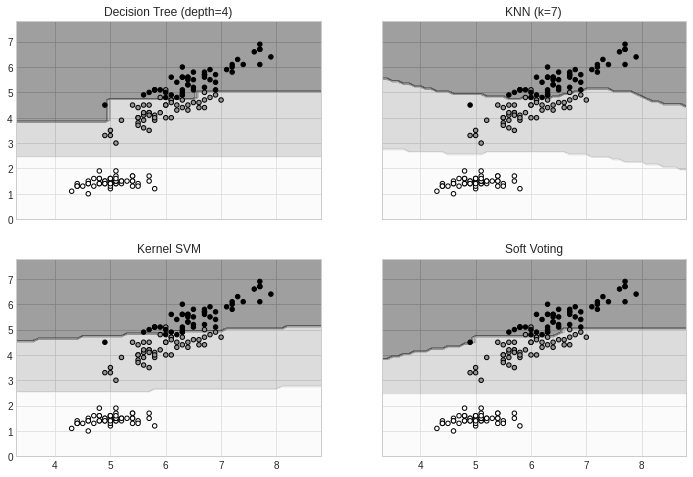

In [262]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Decision Tree (depth=4)', 'KNN (k=7)',
                           'Kernel SVM','Soft Voting']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z , alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

In [263]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor

In [265]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbe',model2),('rfr',model3)],
    weights=[1,1,1]
)

In [266]:
for model in (model1, model2,model3, vote_model):
  model_name = str(type(model)).split('.')[-1][:-2]
  scores = cross_val_score(model, boston.data, boston.target, cv=5)
  print('R2: %0.2f (+- %0.5f) [%s]' % (scores.mean(),scores.std(),model_name))

R2: 0.35 (+- 0.37657) [LinearRegression]
R2: 0.68 (+- 0.15235) [GradientBoostingRegressor]
R2: 0.62 (+- 0.22143) [RandomForestRegressor]
R2: 0.66 (+- 0.19875) [VotingRegressor]


### 회귀식 시각화

In [267]:
X = boston.data[:,0].reshape(-1,1)
y= boston.target

In [268]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor()
model3 = RandomForestRegressor()
vote_model = VotingRegressor(
    estimators=[('linear',model1),('gbe',model2),('rfr',model3)],
    weights=[1,1,1]
)

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
vote_model = vote_model.fit(X,y)

In [272]:
x_min, x_max = X.min()-1, X.max()+1
xx = np.arange(x_min-1,x_max+1, 0.1)

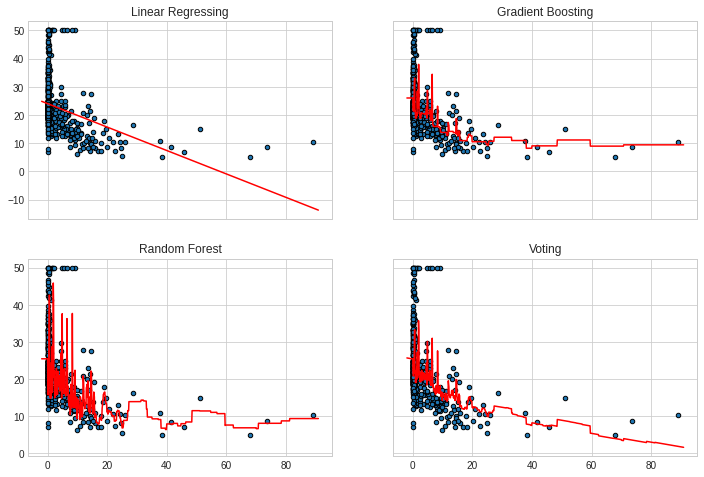

In [273]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Linear Regressing', 'Gradient Boosting',
                           'Random Forest','Voting']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z , c='r')
  axarr[idx[0], idx[1]].scatter(X,y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

In [275]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor

In [276]:
estimators=[('ridge',Ridge()),('lasso',Lasso()),('svr',SVR())]

In [277]:
reg = make_pipeline(
    StandardScaler(),
    StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor()
    )
)

In [278]:
cross_val = cross_validate(
    estimator=reg,
    X=boston.data, y=boston.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))

avg get time: 0.14339098930358887 (+/-) 0.004779354073740818
avg score time: 0.002948760986328125 (+/-) 0.00015878698847300807
avg test score: 0.32453829122482986 (+/-) 0.3387254460493967


#### 회귀식 시각화

In [280]:
X = boston.data[:,0].reshape(-1,1)
y= boston.target

In [281]:
model1 = Ridge()
model2 = Lasso()
model3 = SVR()
reg = StackingRegressor(
        estimators=estimators,
        final_estimator=GradientBoostingRegressor())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
reg = reg.fit(X,y)

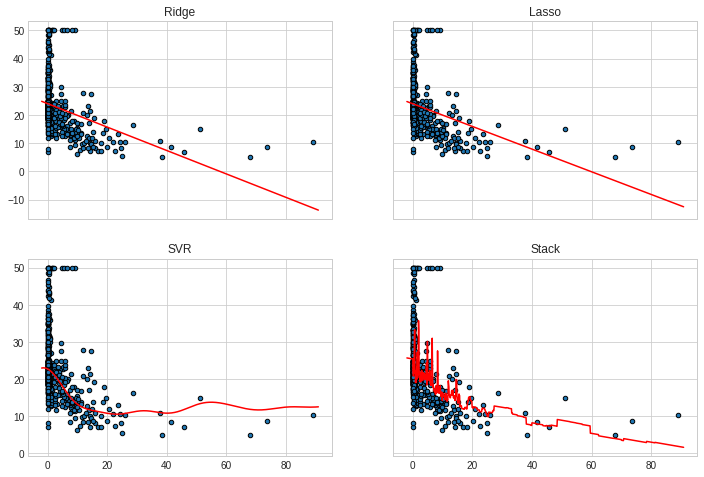

In [282]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, vote_model],
                          ['Ridge', 'Lasso',
                           'SVR','Stack']):
  Z = model.predict(xx.reshape(-1,1))

  axarr[idx[0], idx[1]].plot(xx,Z , c='r')
  axarr[idx[0], idx[1]].scatter(X,y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()

### 스택 분류

In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [286]:
estimators=[('logistic',LogisticRegression(max_iter=10000)),('svc',SVC()),('naive',GaussianNB())]

In [287]:
clf = StackingClassifier(
        estimators=estimators,
        final_estimator=RandomForestClassifier())

In [288]:
cross_val = cross_validate(
    estimator=clf,
    X=iris.data, y=iris.target,
    cv=5
)

print('avg get time: {} (+/-) {}'.format(cross_val['fit_time'].mean(),cross_val['fit_time'].std()))
print('avg score time: {} (+/-) {}'.format(cross_val['score_time'].mean(),cross_val['score_time'].std()))
print('avg test score: {} (+/-) {}'.format(cross_val['test_score'].mean(),cross_val['test_score'].std()))
 

avg get time: 0.27898850440979006 (+/-) 0.0013346238280862702
avg score time: 0.008530426025390624 (+/-) 0.00037187298877724355
avg test score: 0.9666666666666668 (+/-) 0.029814239699997188


#### 결정 경계 시각화

In [289]:
X = iris.data[:,[0,2]]
y = iris.target

In [290]:
model1 = LogisticRegression(max_iter=10000)
model2 = SVC()
model3 = GaussianNB()
stack = StackingClassifier(estimators=estimators,
                           final_estimator=RandomForestClassifier())

model1 = model1.fit(X,y)
model2 = model2.fit(X,y)
model3 = model3.fit(X,y)
stack = stack.fit(X,y)

In [292]:
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min,x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

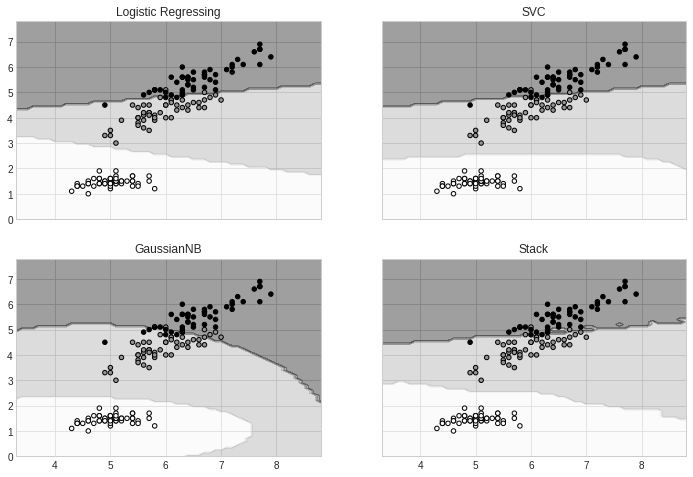

In [293]:
f, axarr = plt.subplots(2,2,sharex='col',sharey='row',figsize=(12,8))

for idx, model, tt in zip(product([0,1],[0,1]),
                          [model1, model2, model3, stack],
                          ['Logistic Regressing', 'SVC',
                           'GaussianNB','Stack']):
  Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z = Z.reshape(xx.shape)

  axarr[idx[0], idx[1]].contourf(xx, yy, Z , alpha=0.4)
  axarr[idx[0], idx[1]].scatter(X[:,0], X[:,1],c=y, s=20, edgecolor='k')
  axarr[idx[0], idx[1]].set_title(tt)

plt.show()